# Exploratory Data Analysis  

Here we are again, with a new episode in our series about doing data science with the two most popular open-source platforms you can use for the job nowadays. In this case we will have a look at a crucial step of the data analytics process, that of the [*Exploratory Data Analysis*](https://en.wikipedia.org/wiki/Exploratory_data_analysis). And with that idea in mind we will explain how to use descriptive statistics and basic plotting, together with data frames, in order to answer some questions and guide our further data analysis.  

*Note: The notebooks for this tutorial are part of those for the data frames ones.*  

### Getting data  

We will continue using the same datasets we already loaded in the part introducing data frames. So you can either continue where you left in that tutorial, or re-run the [section that gets and prepares the data](https://www.codementor.io/python/tutorial/python-vs-r-for-data-science-data-frames-i).  

## Questions we want to answer  

In any data analysis process, there is one or more questions we want to answer. That is the most basic and important step in the whole process, to define these questions. Since we are going to perform some Exploratory Data Analysis in our TB dataset, these are the questions we want to answer:  

- Which are the countries with the highest and infectious TB incidence?  
- What is the general world tendency in the period from 1990 to 2007?  
- What countries don't follow that tendency?  
- What other facts about the disease do we know that we can check with our data?  


## Descriptive Statistics  

The basic data descriptive statistics method for a `pandas.DataFrame` is `describe()`.

In [1]:
local_tb_deaths_file = 'tb_deaths_100.csv'
local_tb_existing_file = 'tb_existing_100.csv'
local_tb_new_file = 'tb_new_100.csv'

import pandas as pd

deaths_df = pd.read_csv(local_tb_deaths_file, index_col = 0, thousands  = ',').T
existing_df = pd.read_csv(local_tb_existing_file, index_col = 0, thousands  = ',').T
new_df = pd.read_csv(local_tb_new_file, index_col = 0, thousands  = ',').T

df_summary = existing_df.describe()
df_summary

"TB prevalence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,353.333333,36.944444,47.388889,12.277778,25.277778,413.444444,35.611111,10.833333,61.222222,74.944444,...,28.055556,128.888889,186.000000,40.888889,282.666667,126.222222,43.388889,194.333333,535.277778,512.833333
std,64.708396,6.915220,4.487091,9.886447,7.274497,97.751318,1.243283,2.812786,20.232634,16.129885,...,3.717561,15.911109,62.027508,2.422660,57.322616,86.784083,8.332353,52.158131,91.975576,113.411925
min,238.000000,22.000000,42.000000,0.000000,17.000000,281.000000,34.000000,7.000000,35.000000,49.000000,...,23.000000,102.000000,102.000000,38.000000,220.000000,13.000000,31.000000,130.000000,387.000000,392.000000
25%,305.000000,32.000000,44.000000,6.000000,19.250000,321.250000,35.000000,9.000000,41.250000,62.000000,...,25.000000,116.500000,128.750000,39.000000,234.250000,63.250000,36.250000,146.750000,459.000000,420.750000
50%,373.500000,40.500000,45.500000,9.000000,22.500000,399.000000,35.000000,10.000000,60.500000,77.000000,...,27.500000,131.500000,185.000000,41.000000,257.000000,106.000000,43.000000,184.500000,521.500000,466.000000
75%,404.500000,42.000000,50.750000,16.250000,31.500000,512.000000,36.000000,12.750000,77.000000,85.750000,...,30.750000,143.000000,240.000000,42.000000,349.000000,165.750000,51.500000,248.500000,620.000000,616.750000
max,436.000000,44.000000,56.000000,42.000000,39.000000,530.000000,38.000000,16.000000,96.000000,99.000000,...,35.000000,152.000000,278.000000,46.000000,365.000000,352.000000,55.000000,265.000000,680.000000,714.000000


###### 8 rows × 207 columns  

There is a lot of information there. We can access individual summaries as follows.

In [2]:
df_summary[['Spain','United Kingdom']]

"TB prevalence, all forms (per 100 000 population per year)",Spain,United Kingdom
count,18.000000,18.000000
mean,30.666667,9.611111
std,6.677442,0.916444
min,23.000000,9.000000
25%,25.250000,9.000000
50%,29.000000,9.000000
75%,34.750000,10.000000
max,44.000000,12.000000


There is a plethora of descriptive statistics methods in Pandas (check the [documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)). Some of them are already included in our summary object, but there are many more. In following tutorials we will make good use of them in order to better understand our data.  

For example, we can obtain the percentage change over the years for the number of tuberculosis cases in Spain.

In [8]:
tb_pct_change_spain = existing_df.Spain.pct_change()
tb_pct_change_spain

1990         NaN
1991   -0.045455
1992   -0.047619
1993   -0.075000
1994   -0.054054
1995   -0.028571
1996   -0.029412
1997   -0.090909
1998    0.000000
1999   -0.066667
2000   -0.035714
2001   -0.037037
2002    0.000000
2003   -0.038462
2004   -0.040000
2005    0.000000
2006    0.000000
2007   -0.041667
Name: Spain, dtype: float64

And from there get the maximum value.

In [9]:
tb_pct_change_spain.max()

0.0

And do the same for the United Kingdom.

In [11]:
existing_df['United Kingdom'].pct_change().max()

0.11111111111111116

If we want to know the index value (year) we use `argmax` (callex `idmax` in later versions of Pandas) as follows.

In [13]:
existing_df['Spain'].pct_change().argmax()

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


'1998'

In [14]:
existing_df['United Kingdom'].pct_change().argmax()

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


'1992'

That is, 1998 and 1992 were the worst years in Spain and the UK respectibely regarding the increase of infectious TB cases. 

## Plotting  

In this section we will take a look at the basic plotting functionality in Python/Pandas. However, there are more powerful alternatives like [**ggplot2**](http://ggplot2.org/) that, although originally created for R, has its own [implementation for Python](http://ggplot.yhathq.com/) from the [Yhat](https://yhathq.com/) guys.  

Pandas DataFrames implement up to three plotting methods out of the box (check the [documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#id11)). The first one is a basic line plot for each of the series we include in the indexing.  The first line might be needed when plotting while using IPython notebook.  

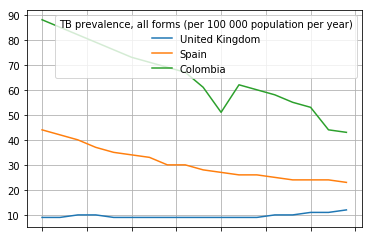

In [19]:
%matplotlib inline
existing_df[['United Kingdom', 'Spain', 'Colombia']].plot(grid=True)

Or we can use box plots to obtain a summarised view of a given series as follows.

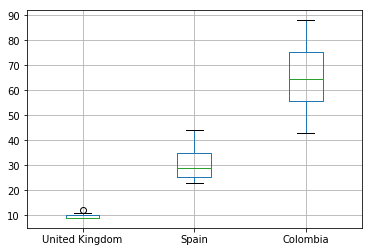

In [21]:
existing_df[['United Kingdom', 'Spain', 'Colombia']].boxplot()

There is also a `histogram()` method, but we can't use it with this type of data right now. 

## Answering Questions  

Let's now start with the real fun. Once we know our tools (from the previous tutorial about data frames and this one), let's use them to answer some questions about the incidence and prevalence of infectious tuberculosis in the world.   

**Question**: *We want to know, per year, what country has the highest number of existing and new TB cases.*

If we want just the top ones we can make use of `apply` and `argmax`. Remember that, by default, `apply` works with columns (the countries in our case), and we want to apply it to each year. Therefore we need to transpose the data frame before using it, or we can pass the argument `axis=1`.

In [23]:
existing_df.apply(pd.Series.argmax, axis=1)

c:\python36\lib\site-packages\pandas\core\frame.py:4933: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  labels=labels)


1990            Djibouti
1991            Djibouti
1992            Djibouti
1993            Djibouti
1994            Djibouti
1995            Djibouti
1996            Kiribati
1997            Kiribati
1998            Cambodia
1999    Korea, Dem. Rep.
2000            Djibouti
2001           Swaziland
2002            Djibouti
2003            Djibouti
2004            Djibouti
2005            Djibouti
2006            Djibouti
2007            Djibouti
dtype: object

But this is too simplistic. Instead, we want to get those countries that are in the fourth quartile. But first we need to find out the world general tendency.

###### World trends in TB cases  


In order to explore the world general tendency, we need to sum up every countries' values for the three datasets, per year.

In [24]:
deaths_total_per_year_df = deaths_df.sum(axis=1)
existing_total_per_year_df = existing_df.sum(axis=1)
new_total_per_year_df = new_df.sum(axis=1)

Now we will create a new `DataFrame` with each sum in a series that we will plot using the data frame `plot()` method.

In [27]:
world_trends_df = pd.DataFrame({
           'Total deaths per 100K' : deaths_total_per_year_df, 
           'Total existing cases per 100K' : existing_total_per_year_df, 
           'Total new cases per 100K' : new_total_per_year_df}, 
       index=deaths_total_per_year_df.index)

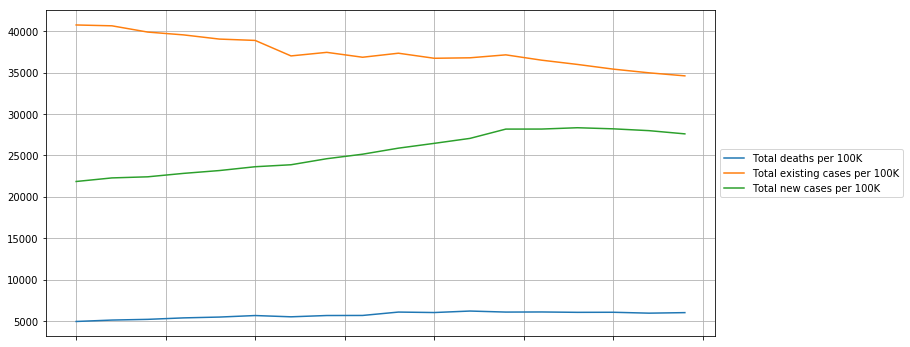

In [29]:
world_trends_df.plot(figsize=(12,6), grid=True).legend(
    loc='center left', 
    bbox_to_anchor=(1, 0.5))

It seems that the general tendency is for a decrease in the total number of **existing cases** per 100K. However the number of **new cases** has been increasing, although it seems reverting from 2005. So how is possible that the total number of existing cases is decreasing if the total number of new cases has been growing? One of the reasons could be the observed increae in the number of **deaths** per 100K, but the main reason we have to consider is that people recovers form tuberculosis thanks to treatment. The sum of the recovery rate plus the death rate is greater than the new cases rate. In any case, it seems that there are more new cases, but also that we cure them better. We need to improve prevention and epidemics control.      

###### Countries out of tendency

So the previous was the general tendency of the world as a whole. So what countries are out of that tendency (for bad)? In order to find this out, first we need to know the distribution of countries in an average year.

In [31]:
deaths_by_country_mean = deaths_df.mean()
deaths_by_country_mean_summary = deaths_by_country_mean.describe()
existing_by_country_mean = existing_df.mean()
existing_by_country_mean_summary = existing_by_country_mean.describe()
new_by_country_mean = new_df.mean()
new_by_country_mean_summary = new_by_country_mean.describe()

We can plot these distributions to have an idea of how the countries are distributed in an average year.

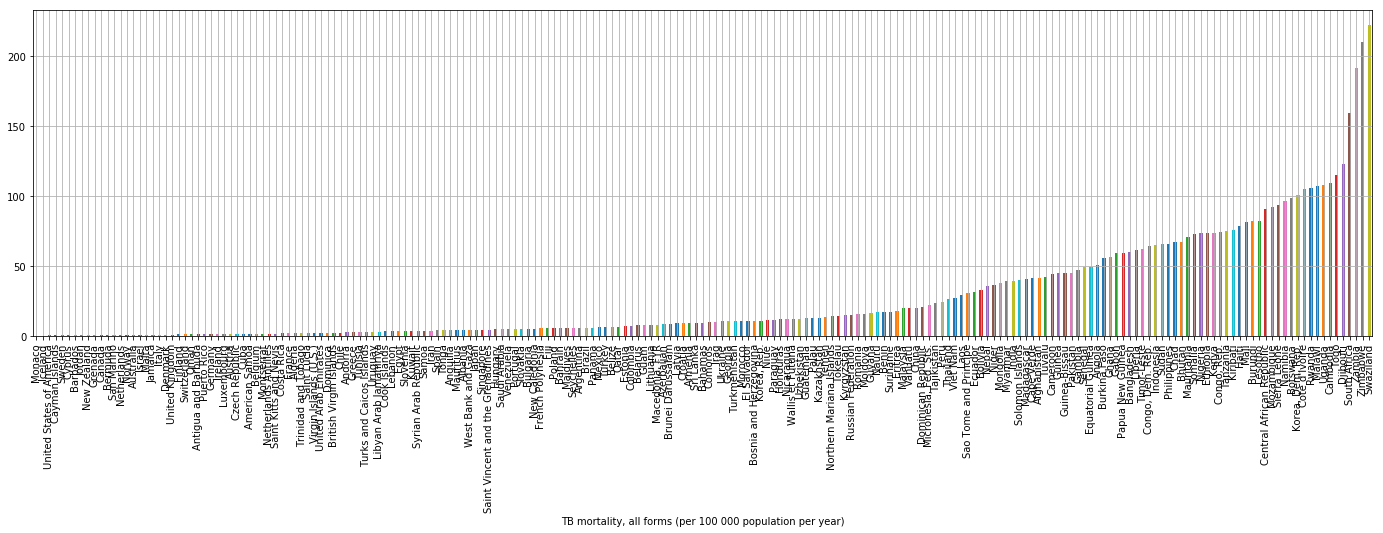

In [34]:
deaths_by_country_mean.sort_values().plot(kind='bar', figsize=(24,6), grid=True)

We want those countries beyond 1.5 times the inter quartile range (50%). We have these values in:

In [35]:
deaths_outlier = deaths_by_country_mean_summary['50%']*1.5
existing_outlier = existing_by_country_mean_summary['50%']*1.5
new_outlier = new_by_country_mean_summary['50%']*1.5

Now we can use these values to get those countries that, across the period 1990-2007 has been beyond those levels.

In [37]:
# Now compare with the outlier threshold
outlier_countries_by_deaths_index = deaths_by_country_mean > deaths_outlier
outlier_countries_by_existing_index = existing_by_country_mean > existing_outlier
outlier_countries_by_new_index = new_by_country_mean > new_outlier

What proportion of countries do we have out of trend? For deaths:

In [38]:
num_countries = len(deaths_df.T)
sum(outlier_countries_by_deaths_index)/num_countries

0.3961352657004831

For existing cases (prevalence):

In [39]:
sum(outlier_countries_by_existing_index)/num_countries

0.3961352657004831

For new cases (incidence):

In [40]:
sum(outlier_countries_by_new_index)/num_countries

0.3864734299516908

Now we can use these indices to filter our original data frames.

In [41]:
outlier_deaths_df = deaths_df.T[ outlier_countries_by_deaths_index ].T
outlier_existing_df = existing_df.T[ outlier_countries_by_existing_index ].T
outlier_new_df = new_df.T[ outlier_countries_by_new_index ].T

This is serious stuff. We have more than one third of the world being outliers on the distribution of existings cases, new cases, and deaths by infectious tuberculosis. But what if we consider an outlier to be 5 times the IQR? Let's repeat the previous process.

In [43]:
deaths_super_outlier = deaths_by_country_mean_summary['50%']*5
existing_super_outlier = existing_by_country_mean_summary['50%']*5
new_super_outlier = new_by_country_mean_summary['50%']*5
    
super_outlier_countries_by_deaths_index = deaths_by_country_mean > deaths_super_outlier
super_outlier_countries_by_existing_index = existing_by_country_mean > existing_super_outlier
super_outlier_countries_by_new_index = new_by_country_mean > new_super_outlier

What proportion do we have now?

In [44]:
sum(super_outlier_countries_by_deaths_index)/num_countries

0.21739130434782608

Let's get the data frames.

In [45]:
super_outlier_deaths_df = deaths_df.T[ super_outlier_countries_by_deaths_index ].T
super_outlier_existing_df = existing_df.T[ super_outlier_countries_by_existing_index ].T
super_outlier_new_df = new_df.T[ super_outlier_countries_by_new_index ].T

Let's concentrate on epidemics control and have a look at the new cases data frame.

In [46]:
super_outlier_new_df

"TB incidence, all forms (per 100 000 population per year)",Bhutan,Botswana,Cambodia,"Congo, Rep.",Cote d'Ivoire,"Korea, Dem. Rep.",Djibouti,Kiribati,Lesotho,Malawi,...,Philippines,Rwanda,Sierra Leone,South Africa,Swaziland,Timor-Leste,Togo,Uganda,Zambia,Zimbabwe
1990,540.0,307.0,585.0,169.0,177.0,344.0,582.0,513.0,184.0,258.0,...,393.0,167.0,207.0,301.0,267.0,322.0,308.0,163.0,297.0,329.0
1991,516.0,341.0,579.0,188.0,196.0,344.0,594.0,503.0,201.0,286.0,...,386.0,185.0,220.0,301.0,266.0,322.0,314.0,250.0,349.0,364.0
1992,492.0,364.0,574.0,200.0,209.0,344.0,606.0,493.0,218.0,314.0,...,380.0,197.0,233.0,302.0,260.0,322.0,320.0,272.0,411.0,389.0
1993,470.0,390.0,568.0,215.0,224.0,344.0,618.0,483.0,244.0,343.0,...,373.0,212.0,248.0,305.0,267.0,322.0,326.0,296.0,460.0,417.0
1994,449.0,415.0,563.0,229.0,239.0,344.0,630.0,474.0,280.0,373.0,...,366.0,225.0,263.0,309.0,293.0,322.0,333.0,306.0,501.0,444.0
1995,428.0,444.0,557.0,245.0,255.0,344.0,642.0,464.0,323.0,390.0,...,360.0,241.0,279.0,317.0,337.0,322.0,339.0,319.0,536.0,474.0
1996,409.0,468.0,552.0,258.0,269.0,344.0,655.0,455.0,362.0,389.0,...,353.0,254.0,297.0,332.0,398.0,322.0,346.0,314.0,554.0,501.0
1997,391.0,503.0,546.0,277.0,289.0,344.0,668.0,446.0,409.0,401.0,...,347.0,273.0,315.0,360.0,474.0,322.0,353.0,320.0,576.0,538.0
1998,373.0,542.0,541.0,299.0,312.0,344.0,681.0,437.0,461.0,412.0,...,341.0,294.0,334.0,406.0,558.0,322.0,360.0,326.0,583.0,580.0
1999,356.0,588.0,536.0,324.0,338.0,344.0,695.0,428.0,519.0,417.0,...,335.0,319.0,355.0,479.0,691.0,322.0,367.0,324.0,603.0,628.0


Let's make some plots to get a better imppression.

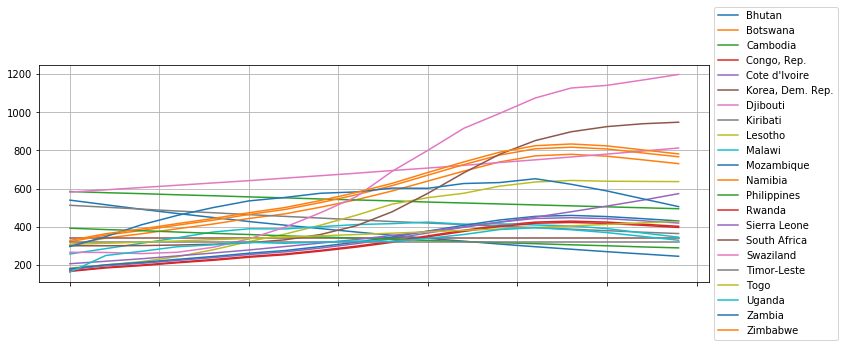

In [48]:
super_outlier_new_df.plot(figsize=(12,4), grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

We have 22 countries where the number of new cases on an average year is greater than 5 times the median value of the distribution. Let's create a country that represents on average these 22.

In [49]:
average_super_outlier_country = super_outlier_new_df.mean(axis=1)
average_super_outlier_country

1990    314.363636
1991    330.136364
1992    340.681818
1993    352.909091
1994    365.363636
1995    379.227273
1996    390.863636
1997    408.000000
1998    427.000000
1999    451.409091
2000    476.545455
2001    502.409091
2002    525.727273
2003    543.318182
2004    548.909091
2005    546.409091
2006    540.863636
2007    535.181818
dtype: float64

Now let's create a country that represents the rest of the world.

In [50]:
avearge_better_world_country = new_df.T[ - super_outlier_countries_by_new_index ].T.mean(axis=1)
avearge_better_world_country

1990    80.751351
1991    81.216216
1992    80.681081
1993    81.470270
1994    81.832432
1995    82.681081
1996    82.589189
1997    84.497297
1998    85.189189
1999    86.232432
2000    86.378378
2001    86.551351
2002    89.848649
2003    87.778378
2004    87.978378
2005    87.086022
2006    86.559140
2007    85.605405
dtype: float64

Now let's plot this country with the average world country.

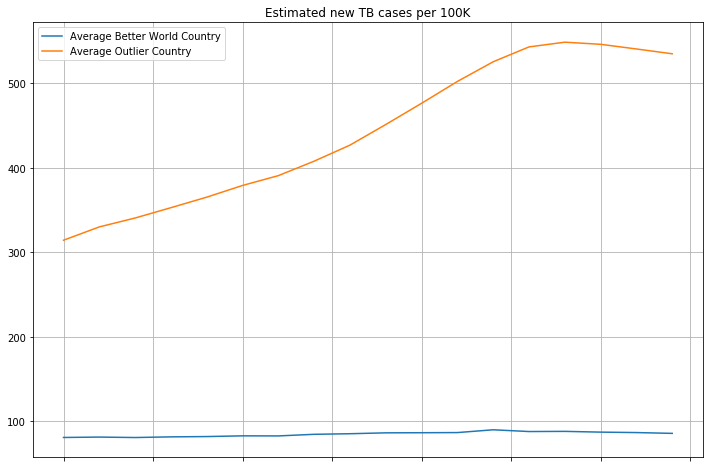

In [53]:
two_world_df = pd.DataFrame({ 
            'Average Better World Country': avearge_better_world_country,
            'Average Outlier Country' : average_super_outlier_country},
        index = new_df.index)
two_world_df.plot(title="Estimated new TB cases per 100K",figsize=(12,8), grid=True)

The increase in new cases tendency is really stronger in the average super outlier country, so stronger that is difficult to perceive that same tendency in the *better world* country. The 90's decade brought a terrible increase in the number of TB cases in those countries. But let's have a look at the exact numbers.

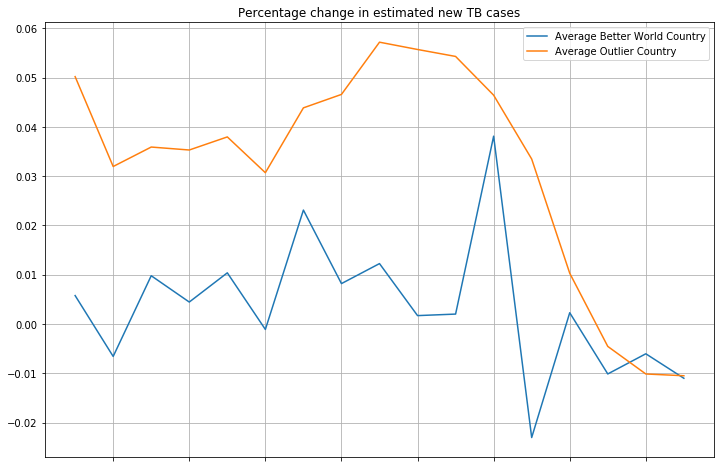

In [55]:
two_world_df.pct_change().plot(title="Percentage change in estimated new TB cases", figsize=(12,8), grid=True)

The deceleration and reversion of that tendency seem to happen at the same time in both average countries, something around 2002? We will try to find out in the next section.

### Googling about events and dates in Tuberculosis

We will use just Python in this section. About googling, actually we just went straight to [Wikipedia's entry about the disease](https://en.wikipedia.org/wiki/Tuberculosis#Epidemiology). In the epidemics sections we found the following: 

- The total number of tuberculosis cases has been decreasing since 2005, while **new cases** have decreased since 2002.  
 - This is confirmed by our previous analysis.    

- China has achieved particularly dramatic progress, with about an 80% reduction in its TB mortality rate between 1990 and 2010. Let's check it:  

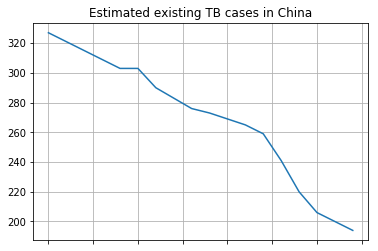

In [57]:
existing_df.China.plot(title="Estimated existing TB cases in China", grid=True)

- In 2007, the country with the highest estimated incidence rate of TB was Swaziland, with 1,200 cases per 100,000 people.

In [58]:
new_df.apply(pd.Series.argmax, axis=1)['2007']

c:\python36\lib\site-packages\pandas\core\frame.py:4933: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  labels=labels)


'Swaziland'

There are many more findings Wikipedia that we can confirm with these or other datasets from Gapminder world. For example, TB and HIV are frequently associated, together with poverty levels. It would be interesting to join datasets and explore tendencies in each of them. We challenge the reader to give them a try and share with us their findings. 

### Other web pages to explore

Some interesting resources about tuberculosis apart from the Gapminder website: 

- Gates foundation:  
 - http://www.gatesfoundation.org/What-We-Do/Global-Health/Tuberculosis  
 - http://www.gatesfoundation.org/Media-Center/Press-Releases/2007/09/New-Grants-to-Fight-Tuberculosis-Epidemic  

## Conclusions  

Exploratory data analysis is a key step in data analysis. It is during this stage when we start shaping any later work. It precedes any data visualisation or machine learning work, by showing us good or bad our data and our hypothesis are.   

Traditionally, R has been the weapon of choice for most EDA work, although the use of a more expressive plotting library such as gglot2 is quite convenient. In fact, the base plotting functionality incorporated in Pandas makes the process cleaner and quicker when using Python. However, the questions we have answered here were very simple and didn't include multiple variables and encodings. In such cases an advanced library like ggplot2 will shine. Apart from providing nicer charts, it will saves us quite a lot of time due to its expressiveness and reusability.  

But as simple as our analysis and charts are, we have been able to make the point about how serious the humanitarian crisis is regarding a disease like tuberculosis, specially when considering that the disease is relatively well controlled in more developed countries. We have seen how some coding skills and a good amount of curiosity allows us to create awareness in these and other world issues.